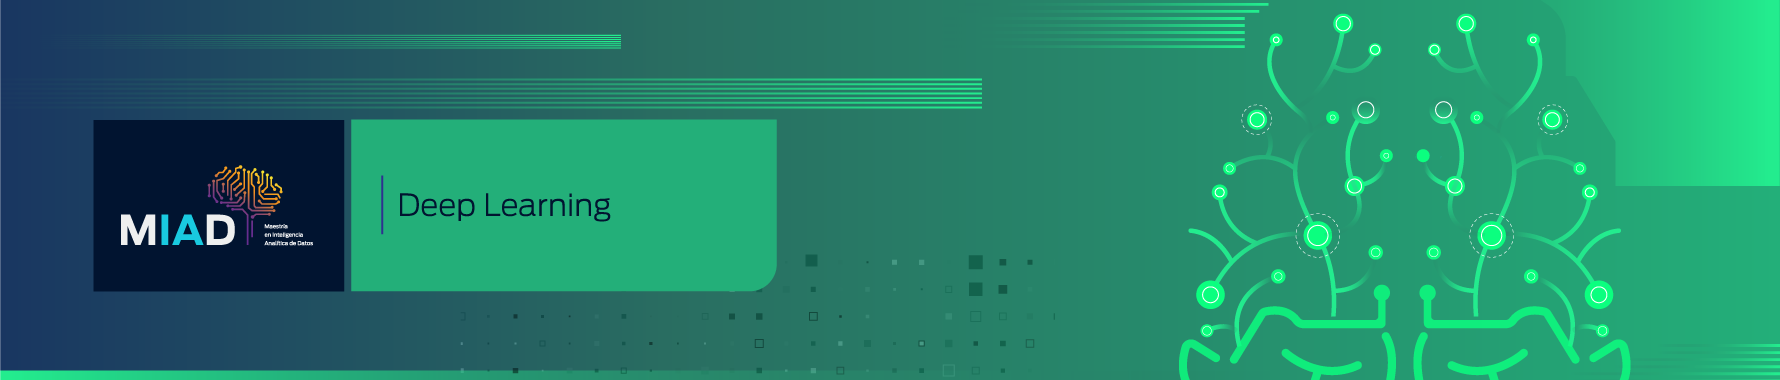

# Redes neuronales usando keras: Comparación de estrategias de regularización


## Actividad calificada por el personal


### Propósito 
En este notebook se pretende evaluar el uso de keras al aplicar una red neuronal en un contexto real haciendo uso de mecanismos de regularización tales como *drop out*, *early stopping*, norma 1 y norma 2 haciendo uso del paquete Keras.

### Instrucciones generales
1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).


### Criterios a evaluar
Los criterios que se evaluarán son:   

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. Realice la partición de la muestra en _train_ y _test_. [5 puntos]

Estimación de un modelo utilizando redes neuronales con *dropout*: Se estima el modelo usando una red neuronal con *dropout* , se evalúa en la muestra de test. [20 puntos]

Estimación de un modelo utilizando redes neuronales con *early stopping*: Se estima el modelo usando una red neuronal con *early stopping*, se evalúa en la muestra de test. [20 puntos]

Estimación de un modelo utilizando redes neuronales con norma 1: Se estima el modelo usando una red neuronal con norma 1, se evalúa en la muestra de test. [20 puntos]

Estimación de un modelo utilizando redes neuronales con norma 2: Se estima el modelo usando una red neuronal con norma 2, se evalúa en la muestra de test. [20 puntos]

Comparación de modelos: Se elige la mejor regularización a partir de una comparación. [15 puntos]

#### Problema
Un manager de un banco manifiesta preocupación porque los clientes están renunciando a las tarjetas de crédito. Este cuenta con los datos disponibles en https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers a cerca de 10000 clientes, si tiene productos activos o no (*"Attrition flag"*), en función de variables tales como edad, salario, estado civil, límite de tarjeta de crédito, categoría de tarjeta de crédito, etc.

Ustedes deben proponer el algoritmo para hacer la clasificación de los clientes con una red neuronal.

Finalmente, para resolver los puntos de esta actividad deberán tener en cuenta únicamente las variables continuas (se deben eliminar las variables categóricas) y deberán eliminar las observaciones con datos faltantes.

### Librerías a importar

In [39]:
import time
from math import exp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from matplotlib.image import imread
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Librerías específicas de Keras/TensorFlow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.callbacks import EarlyStopping
from keras import regularizers


### 1. Análisis preliminar de variables [5 puntos]
Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

In [3]:
# Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####
df = pd.read_csv("BankChurners.csv")
df = df.drop(columns=['CLIENTNUM', 
                      'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                      'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

df['Attrition_Flag'] = df['Attrition_Flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df = df.drop(columns=categorical_cols)
df

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,1,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,1,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,1,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [4]:
df.describe()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.160660,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Dependent_count           10127 non-null  int64  
 3   Months_on_book            10127 non-null  int64  
 4   Total_Relationship_Count  10127 non-null  int64  
 5   Months_Inactive_12_mon    10127 non-null  int64  
 6   Contacts_Count_12_mon     10127 non-null  int64  
 7   Credit_Limit              10127 non-null  float64
 8   Total_Revolving_Bal       10127 non-null  int64  
 9   Avg_Open_To_Buy           10127 non-null  float64
 10  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 11  Total_Trans_Amt           10127 non-null  int64  
 12  Total_Trans_Ct            10127 non-null  int64  
 13  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 14  Avg_Ut

In [6]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Dependent_count             0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [7]:
missing_percentage = df.isna().sum() / len(df) * 100
print(missing_percentage)

Attrition_Flag              0.0
Customer_Age                0.0
Dependent_count             0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64


In [8]:
cols = 4
rows = len(df.columns) // cols + (len(df.columns) % cols > 0)
fig = make_subplots(rows=rows, cols=cols, subplot_titles=df.columns)
for i, column in enumerate(df.columns):
    row = i // cols + 1
    col = i % cols + 1
    fig.add_trace(
        go.Histogram(x=df[column], name=column),
        row=row, col=col
    )
fig.update_layout(height=300 * rows, width=1000, title_text="Histogramas de las Variables")
fig.show()

In [9]:
corr = df.corr()

fig = ff.create_annotated_heatmap(
    z=corr.values,
    x=corr.columns.tolist(),
    y=corr.columns.tolist(),
    annotation_text=corr.round(2).values,
    colorscale='Earth',
    showscale=True
)

fig.update_layout(
    title='Matriz de Correlación Interactiva',
    xaxis=dict(tickangle=45),
    yaxis=dict(tickangle=0),
    width=800,
    height=800
)

fig.show()

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 1)

In [10]:
##### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####

X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


### 2. Estimación de un modelo utilizando redes neuronales con *dropout* [20 puntos]

Estimen un modelo predictivo usando la muestra de entrenamiento y evalúen su desempeño en test utilizando una **probabilidad de 0.25**.

In [11]:
modeldp = Sequential()
modeldp.add(Input(shape=(14,)))
modeldp.add(Dense(30,activation='relu'))
modeldp.add(Dropout(0.05))
modeldp.add(Dense(20, activation='relu'))
modeldp.add(Dropout(0.05))
modeldp.add(Dense(1, activation='sigmoid'))

In [12]:
modeldp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
historydp=modeldp.fit(X_train, y_train, epochs=25, batch_size=10 )

Epoch 1/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7619 - loss: 50.6737
Epoch 2/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8205 - loss: 1.2932
Epoch 3/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8341 - loss: 0.5197
Epoch 4/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8385 - loss: 0.5984
Epoch 5/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8370 - loss: 0.5925
Epoch 6/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8522 - loss: 0.5005
Epoch 7/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8354 - loss: 0.4440
Epoch 8/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8455 - loss: 0.3885
Epoch 9/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8402 - loss: 0.4673
Epoch 10/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8355 - loss: 0.4067
Epoch 11/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8384 - loss: 0.4018
Epoch 12/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/ste

In [14]:
_, accuracy = modeldp.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.8428 - loss: 0.3547
Accuracy: 84.09


In [15]:
prediccionesdp = modeldp.predict(X_test)
redondeadodp = [round(x[0]) for x in prediccionesdp]
prediccionesdp = (modeldp.predict(X_test) > 0.5).astype(int)

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step


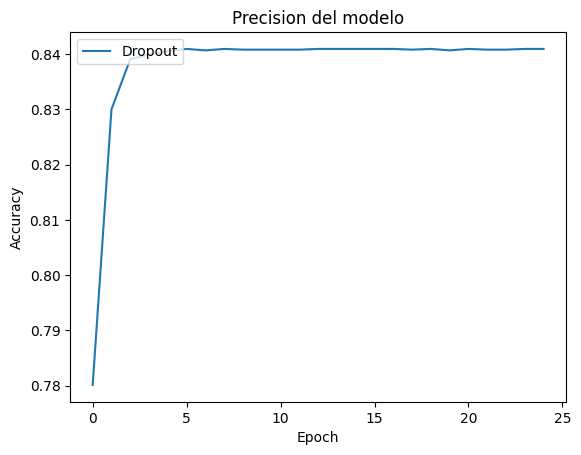

In [16]:
plt.figure(1)
# Graficar accuracy del modelo
plt.title('Precision del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(historydp.history['accuracy'])
plt.legend(['Dropout'], loc='upper left')
plt.show()

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 2)

### 3. Estimación de un modelo utilizando redes neuronales con *early stopping* [20 puntos]

Estimen un modelo predictivo usando la muestra de entrenamiento y evalúen su desempeño en test utilizando una **paciencia de 2**.

In [40]:
##### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####
modeles = Sequential()
modeles.add(Input(shape=(14,)))
modeles.add(Dense(40,activation='relu'))
modeles.add(Dense(20, activation='relu'))
modeles.add(Dense(1, activation='sigmoid'))

In [41]:
modeles.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
historyes = modeles.fit(X_train, y_train, epochs=25, batch_size=10,callbacks= [EarlyStopping(monitor='val_accuracy', patience=2)])


Epoch 1/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8208 - loss: 4.4046
Epoch 2/25
140/760 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8198 - loss: 2.0385

C:\Users\dshar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning:

Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: accuracy,loss



760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8255 - loss: 2.3317
Epoch 3/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8214 - loss: 2.9126
Epoch 4/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step - accuracy: 0.8282 - loss: 2.0171
Epoch 5/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8354 - loss: 1.7494
Epoch 6/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8320 - loss: 2.2397
Epoch 7/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8282 - loss: 1.8460
Epoch 8/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8170 - loss: 2.1046
Epoch 9/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 911us/step - accuracy: 0.8412 - loss: 1.4669
Epoch 10/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8464 - loss: 1.0029
Epoch 11/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8397 - loss: 1.4605
Epoch 12/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step - accuracy: 0.8575 - loss: 0.9132
Epoch 13/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step -

In [53]:
_, accuracy = modeles.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.8523 - loss: 1.0088
Accuracy: 85.17


In [54]:
prediccioneses = modeles.predict(X_test)
redondeadoes = [round(x[0]) for x in prediccioneses]
prediccioneses = (modeles.predict(X_test) > 0.5).astype(int)

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step


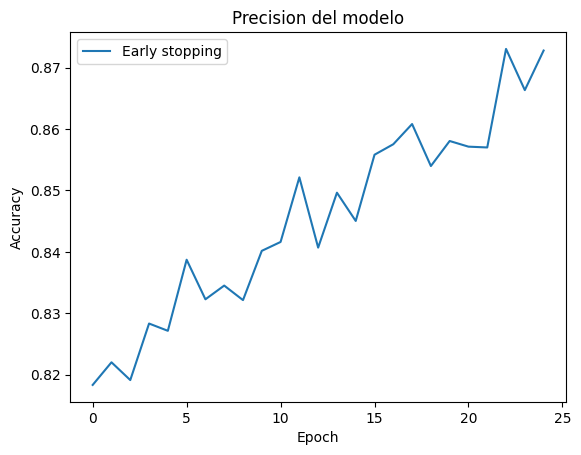

In [55]:
plt.figure(1)
# Graficar accuracy del modelo
plt.title('Precision del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(historyes.history['accuracy'])
plt.legend(['Early stopping'], loc='upper left')
plt.show()

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 3)

### 4. Estimación de un modelo utilizando redes neuronales con norma 1 [20 puntos]

Estimen un modelo predictivo usando la muestra de entrenamiento y evalúen su desempeño en test utilizando un **_alpha_ de 0.001**.

In [23]:
##### Utilicen este espacio para escribir los códigos del procedimiento del punto 4 ####
model1 = Sequential()
model1.add(Input(shape=(14,)))
model1.add(Dense(30, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model1.add(Dense(20, activation='relu',  kernel_regularizer=regularizers.l1(0.001)))
model1.add(Dense(1, activation='sigmoid'))

In [24]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
history1=model1.fit(X_train, y_train, epochs=25, batch_size=10,verbose=1 )
#epochs=50, batch_size=32, verbose=1

Epoch 1/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7684 - loss: 17.2661
Epoch 2/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7876 - loss: 8.2400
Epoch 3/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 993us/step - accuracy: 0.8087 - loss: 5.8485
Epoch 4/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7862 - loss: 6.6924
Epoch 5/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 953us/step - accuracy: 0.7917 - loss: 5.6902
Epoch 6/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7999 - loss: 3.2631
Epoch 7/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8033 - loss: 3.7851
Epoch 8/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - accuracy: 0.8165 - loss: 2.5861
Epoch 9/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8152 - loss: 2.8755
Epoch 10/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8201 - loss: 1.9615
Epoch 11/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8085 - loss: 3.1249
Epoch 12/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 9

In [26]:
_, accuracy = model1.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.8636 - loss: 0.3918
Accuracy: 86.19


In [27]:
predicciones1 = model1.predict(X_test)
redondeado1 = [round(x[0]) for x in predicciones1]
predicciones1 = (model1.predict(X_test) > 0.5).astype(int)

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step


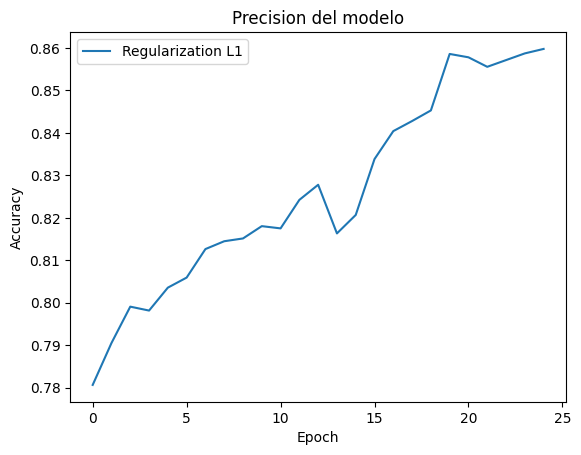

In [28]:
plt.figure(1)
# Graficar accuracy del modelo
plt.title('Precision del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(history1.history['accuracy'])
plt.legend(['Regularization L1'], loc='upper left')
plt.show()

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 4)

### 5. Estimación de un modelo utilizando redes neuronales con norma 2 [20 puntos]

Estimen un modelo predictivo usando la muestra de entrenamiento y evalúen su desempeño en test utilizando un **_alpha_ de 0.001**.

In [29]:
##### Utilicen este espacio para escribir los códigos del procedimiento del punto 5 ####
model2 = Sequential()
model2.add(Input(shape=(14,)))
model2.add(Dense(30, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model2.add(Dense(20, activation='relu',  kernel_regularizer=regularizers.l2(0.001)))
model2.add(Dense(1, activation='sigmoid'))

In [30]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
history2=model2.fit(X_train, y_train, epochs=25, batch_size=10 )

Epoch 1/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7792 - loss: 34.5429
Epoch 2/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8139 - loss: 8.9662
Epoch 3/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 920us/step - accuracy: 0.7915 - loss: 15.1877
Epoch 4/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step - accuracy: 0.7972 - loss: 11.7645
Epoch 5/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 890us/step - accuracy: 0.8042 - loss: 7.2047
Epoch 6/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 866us/step - accuracy: 0.8176 - loss: 5.4519
Epoch 7/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step - accuracy: 0.7991 - loss: 6.5779
Epoch 8/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8188 - loss: 4.3251
Epoch 9/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8140 - loss: 4.6892
Epoch 10/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8142 - loss: 3.5493
Epoch 11/25
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 969us/step - accuracy: 0.8084 - loss: 3.4071
Epoch 12/25
760/760 ━━━━━━━━━━━━━━━━━

In [32]:
_, accuracy = model2.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.8291 - loss: 0.4951
Accuracy: 83.45


In [33]:
predicciones2 = model2.predict(X_test)
redondeado2 = [round(x[0]) for x in predicciones2]
predicciones2 = (model2.predict(X_test) > 0.5).astype(int)

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step


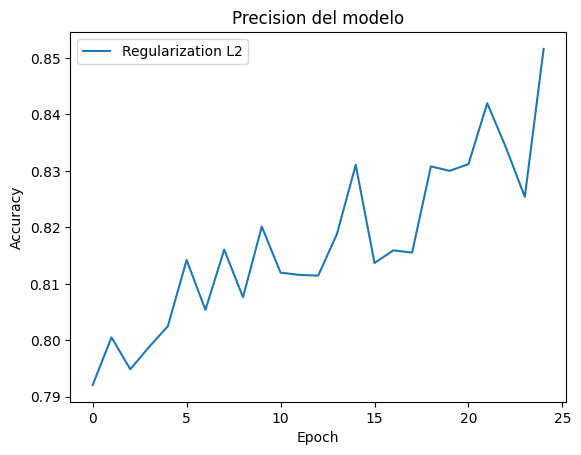

In [34]:
plt.figure(1)
# Graficar accuracy del modelo
plt.title('Precision del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(history2.history['accuracy'])
plt.legend(['Regularization L2'], loc='upper left')
plt.show()

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 5)

### 6. Comparación de modelos de regularización [15 puntos]

Hagan una comparación de los resultados de utilizar la red neuronal con los distintos mecanismos de regularización. Analice los resultados. 


In [57]:
##### Utilicen este espacio para escribir los códigos del procedimiento del punto 6 ####
test_loss1, test_acc1 = model1.evaluate(X_test, y_test)
test_loss2, test_acc2 = model2.evaluate(X_test, y_test)
test_lossdp, test_accdp = modeldp.evaluate(X_test, y_test)
test_losses, test_acces = modeles.evaluate(X_test, y_test)

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8598 - loss: 0.4103
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.8242 - loss: 0.5395
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.8526 - loss: 0.3516
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.8571 - loss: 1.0332


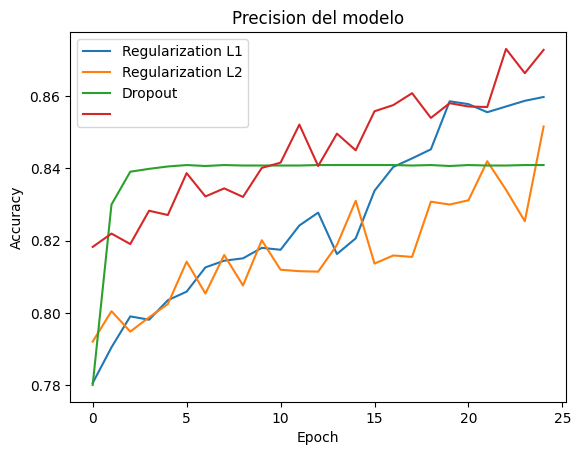

In [58]:
plt.figure(1)
# Graficar accuracy del modelo
plt.title('Precision del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(historydp.history['accuracy'])
plt.plot(historyes.history['accuracy'])
plt.legend(['Regularization L1', 'Regularization L2', 'Dropout', '' ], loc='upper left')
plt.show()

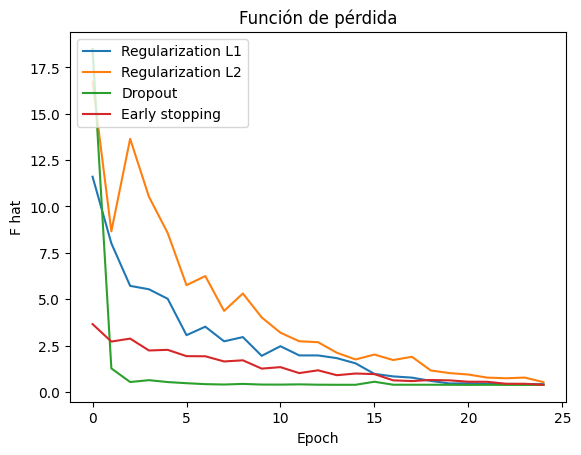

In [59]:
# Graficar la función de pérdida evaluada
plt.title('Función de pérdida')
plt.ylabel('F hat')
plt.xlabel('Epoch')
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(historydp.history['loss'])
plt.plot(historyes.history['loss'])
plt.legend(['Regularization L1', 'Regularization L2', 'Dropout', 'Early stopping' ], loc='upper left')
plt.show()

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 6)